In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet 
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

/Users/polfuentes/opt/anaconda3/envs/LauzHack/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:


df = pd.read_csv('../clean_data/ex_factory_vols.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    51 non-null     object 
 1   Data type  51 non-null     object 
 2   Measure    51 non-null     object 
 3   Product    51 non-null     object 
 4   Date       51 non-null     object 
 5   Value      51 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [4]:
df.index.min(), df.index.max()


(0, 50)

In [5]:
# Preparing the data
uni_data = df.reset_index()[['Date', 'Value']]
uni_data = uni_data.rename(columns={'Date': 'ds', 'Value': 'y'})

uni_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      51 non-null     object 
 1   y       51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 948.0+ bytes


In [6]:
## preprocess data





In [7]:
# Splitting the data into training and validation sets
split_date = '2023-12-01' 
train = uni_data[uni_data['ds'] < split_date]
test = uni_data[uni_data['ds'] >= split_date]

print(f"train shape : {train.shape} and test shape : {test.shape}")

train shape : (40, 2) and test shape : (11, 2)


In [8]:

# Training the model
uni_model = Prophet()
uni_model.fit(train)

23:24:52 - cmdstanpy - INFO - Chain [1] start processing
23:24:53 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Making predictions on the validation set
future_uni = uni_model.make_future_dataframe(periods=20, freq='MS')
forecast_uni = uni_model.predict(future_uni)

In [10]:
forecast_uni.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50,2024-10-01,114022.264409,102981.980000,118687.092451,114019.457031,114025.066214,-2961.722626,-2961.722626,-2961.722626,-2961.722626,-2961.722626,-2961.722626,0.0,0.0,0.0,111060.541783
51,2024-11-01,116227.347996,113982.274438,129784.068782,116224.137306,116230.615134,5247.010506,5247.010506,5247.010506,5247.010506,5247.010506,5247.010506,0.0,0.0,0.0,121474.358502
52,2024-12-01,118361.299854,109861.912301,125937.589304,118357.646229,118365.044783,-541.403187,-541.403187,-541.403187,-541.403187,-541.403187,-541.403187,0.0,0.0,0.0,117819.896666
53,2025-01-01,120566.383440,111436.824914,127243.588565,120562.259347,120570.593511,-1583.784547,-1583.784547,-1583.784547,-1583.784547,-1583.784547,-1583.784547,0.0,0.0,0.0,118982.598894
54,2025-02-01,122771.467027,112067.456542,128016.397610,122766.774521,122776.213671,-2660.929818,-2660.929818,-2660.929818,-2660.929818,-2660.929818,-2660.929818,0.0,0.0,0.0,120110.537209
55,2025-03-01,124763.155428,116865.964440,132772.224956,124758.187723,124768.413813,-121.372879,-121.372879,-121.372879,-121.372879,-121.372879,-121.372879,0.0,0.0,0.0,124641.782549
56,2025-04-01,126968.239015,113598.258170,129792.569221,126962.724172,126973.997464,-5091.645730,-5091.645730,-5091.645730,-5091.645730,-5091.645730,-5091.645730,0.0,0.0,0.0,121876.593284
57,2025-05-01,129102.190873,121284.046338,138115.974185,129096.263702,129108.520624,798.571038,798.571038,798.571038,798.571038,798.571038,798.571038,0.0,0.0,0.0,129900.761910
58,2025-06-01,131307.274459,117355.078418,132888.363930,131300.818750,131314.081025,-6449.014143,-6449.014143,-6449.014143,-6449.014143,-6449.014143,-6449.014143,0.0,0.0,0.0,124858.260317
59,2025-07-01,133441.226318,128276.054760,143895.428691,133434.162671,133448.663249,2635.974859,2635.974859,2635.974859,2635.974859,2635.974859,2635.974859,0.0,0.0,0.0,136077.201177


In [11]:
test.columns


Index(['ds', 'y'], dtype='object')

In [12]:
y_pred_df_uni = forecast_uni[forecast_uni['ds'] >= split_date][['ds', 'yhat']]
print(y_pred_df_uni.head())

           ds          yhat
40 2023-12-01  82075.118806
41 2024-01-01  95357.834873
42 2024-02-01  94477.323306
43 2024-03-01  95155.890784
44 2024-04-01  99231.779232


In [13]:

result = pd.merge(test, y_pred_df_uni, how='inner')

result.shape

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'ds'. If you wish to proceed you should use pd.concat

In [192]:
#calculate rmse and mae
rmse = np.sqrt(np.mean((result['y']-result['yhat'])**2))
mae = (np.mean(np.abs(result['y']-result['yhat'])))

print(f"RMSE from Univariate Analysis is : {rmse}")
print(f"MAE from Univariate Analysis is : {mae}")

RMSE from Univariate Analysis is : 32031.434713652572
MAE from Univariate Analysis is : 22610.978510026198


<Axes: xlabel='ds'>

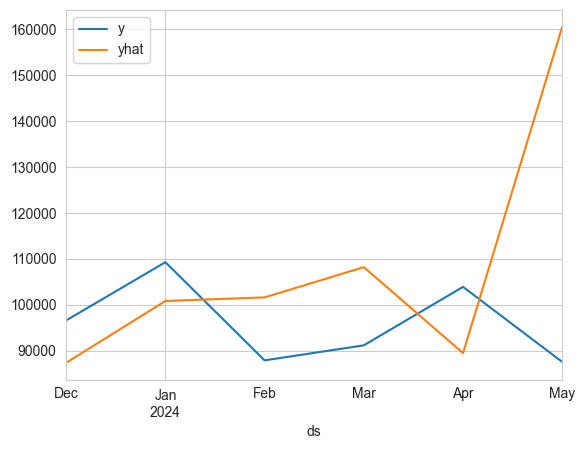

In [193]:
result.set_index('ds').plot()


In [14]:
# Making predictions on the validation set
future_uni = uni_model.make_future_dataframe(periods=20, freq='MS')
forecast_uni = uni_model.predict(future_uni)
forecast_uni.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50,2024-10-01,114022.264409,102835.130018,119932.108336,114019.131582,114025.497371,-2961.722626,-2961.722626,-2961.722626,-2961.722626,-2961.722626,-2961.722626,0.0,0.0,0.0,111060.541783
51,2024-11-01,116227.347996,113623.686174,129522.024546,116223.851279,116231.042897,5247.010506,5247.010506,5247.010506,5247.010506,5247.010506,5247.010506,0.0,0.0,0.0,121474.358502
52,2024-12-01,118361.299854,109434.471690,125545.191500,118357.322696,118365.496900,-541.403187,-541.403187,-541.403187,-541.403187,-541.403187,-541.403187,0.0,0.0,0.0,117819.896666
53,2025-01-01,120566.383440,110800.712062,127271.920328,120561.963273,120571.010745,-1583.784547,-1583.784547,-1583.784547,-1583.784547,-1583.784547,-1583.784547,0.0,0.0,0.0,118982.598894
54,2025-02-01,122771.467027,112054.294798,128477.965789,122766.471510,122776.675305,-2660.929818,-2660.929818,-2660.929818,-2660.929818,-2660.929818,-2660.929818,0.0,0.0,0.0,120110.537209
55,2025-03-01,124763.155428,116624.457386,132372.100416,124757.656684,124768.947678,-121.372879,-121.372879,-121.372879,-121.372879,-121.372879,-121.372879,0.0,0.0,0.0,124641.782549
56,2025-04-01,126968.239015,113419.824506,129785.381205,126962.211816,126974.618002,-5091.645730,-5091.645730,-5091.645730,-5091.645730,-5091.645730,-5091.645730,0.0,0.0,0.0,121876.593284
57,2025-05-01,129102.190873,122010.937048,138505.652498,129095.586180,129109.044533,798.571038,798.571038,798.571038,798.571038,798.571038,798.571038,0.0,0.0,0.0,129900.761910
58,2025-06-01,131307.274459,116868.347169,133157.403851,131300.089261,131314.698471,-6449.014143,-6449.014143,-6449.014143,-6449.014143,-6449.014143,-6449.014143,0.0,0.0,0.0,124858.260317
59,2025-07-01,133441.226318,127737.296665,143911.762726,133433.554209,133449.066028,2635.974859,2635.974859,2635.974859,2635.974859,2635.974859,2635.974859,0.0,0.0,0.0,136077.201177


In [15]:
# Display the last 10 predictions
print(forecast_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# If you want to filter and display only the new predicted dates (future periods):
predicted_future = forecast_uni[forecast_uni['ds'] > test['ds'].max()]
print(predicted_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds           yhat     yhat_lower     yhat_upper
50 2024-10-01  111060.541783  102835.130018  119932.108336
51 2024-11-01  121474.358502  113623.686174  129522.024546
52 2024-12-01  117819.896666  109434.471690  125545.191500
53 2025-01-01  118982.598894  110800.712062  127271.920328
54 2025-02-01  120110.537209  112054.294798  128477.965789
55 2025-03-01  124641.782549  116624.457386  132372.100416
56 2025-04-01  121876.593284  113419.824506  129785.381205
57 2025-05-01  129900.761910  122010.937048  138505.652498
58 2025-06-01  124858.260317  116868.347169  133157.403851
59 2025-07-01  136077.201177  127737.296665  143911.762726
           ds           yhat     yhat_lower     yhat_upper
51 2024-11-01  121474.358502  113623.686174  129522.024546
52 2024-12-01  117819.896666  109434.471690  125545.191500
53 2025-01-01  118982.598894  110800.712062  127271.920328
54 2025-02-01  120110.537209  112054.294798  128477.965789
55 2025-03-01  124641.782549  116624.457386  132372.1004

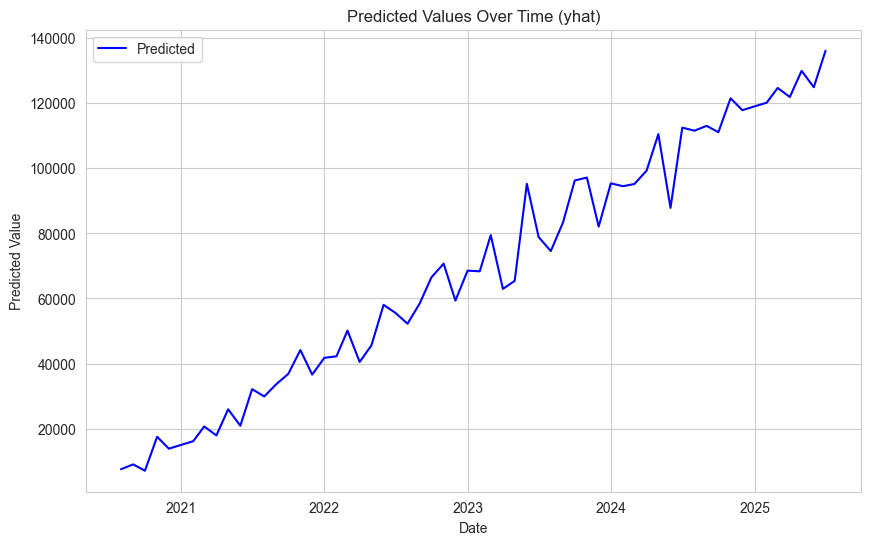

In [16]:
import matplotlib.pyplot as plt

# Plot ds vs yhat
plt.figure(figsize=(10, 6))
plt.plot(forecast_uni['ds'], forecast_uni['yhat'], label='Predicted', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Predicted Values Over Time (yhat)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()